In [1]:
!pip install pandas tensorflow matplotlib numpy pyyaml h5py  &> /dev/null

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%tensorflow_version 2.x
print(tf.version)
print("Setup Complete")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>
Setup Complete


In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [371]:
ds = pd.read_csv("/content/drive/MyDrive/flamefrontds.csv", header = None)
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281
0,609,677,181,175,175,182,182,176,172,169,...,85,79,73,82,88,83,91,93,87,86
1,612,683,182,183,176,180,179,181,175,167,...,84,77,77,84,79,87,89,83,92,100
2,611,681,177,176,177,172,178,185,185,173,...,86,86,80,78,76,76,83,91,96,93
3,591,649,181,179,180,175,168,179,176,178,...,89,75,90,96,91,81,89,85,81,78
4,683,633,191,178,181,168,174,195,184,180,...,92,89,81,81,78,82,78,89,88,94


In [372]:
front = ds.iloc[:, [0]]
back = ds.iloc[:, [1]]
img = ds.iloc[:, 2:]
print(front.head())
print(back.head())
print(img.head())
print(img.shape)

     0
0  609
1  612
2  611
3  591
4  683
     1
0  677
1  683
2  681
3  649
4  633
   2     3     4     5     6     7     8     9     10    11    ...  1272  \
0   181   175   175   182   182   176   172   169   165   161  ...    85   
1   182   183   176   180   179   181   175   167   169   174  ...    84   
2   177   176   177   172   178   185   185   173   170   177  ...    86   
3   181   179   180   175   168   179   176   178   176   184  ...    89   
4   191   178   181   168   174   195   184   180   183   181  ...    92   

   1273  1274  1275  1276  1277  1278  1279  1280  1281  
0    79    73    82    88    83    91    93    87    86  
1    77    77    84    79    87    89    83    92   100  
2    86    80    78    76    76    83    91    96    93  
3    75    90    96    91    81    89    85    81    78  
4    89    81    81    78    82    78    89    88    94  

[5 rows x 1280 columns]
(463, 1280)


In [373]:
img_single_column = img.apply(lambda row: ' '.join(row.astype(str)), axis = 1)
# front_single_column = front.apply(lambda row: ' '.join(row.astype(str)), axis = 1)
# back_single_column = back.apply(lambda row: ' '.join(row.astype(str)), axis = 1)

img_data = img_single_column.values
print(img_data[0])

front_data = front.values
back_data = back.values
print(front_data[0])
print(back_data[0])

181 175 175 182 182 176 172 169 165 161 174 165 170 170 167 176 182 178 177 179 188 177 180 186 182 182 184 184 182 183 186 187 176 178 183 181 181 182 173 174 174 176 193 187 173 172 184 185 189 200 192 181 186 200 198 191 189 189 188 182 193 207 213 201 199 204 204 191 193 201 210 207 197 203 205 204 201 208 218 208 206 197 196 212 201 204 226 218 206 194 193 206 218 208 205 211 220 222 224 230 222 220 226 223 219 229 236 230 221 219 218 235 250 240 234 227 226 238 252 245 224 217 231 240 236 247 251 245 241 240 243 243 248 244 249 237 252 253 253 256 244 246 255 252 261 264 267 258 241 251 257 257 258 263 259 253 259 263 273 273 254 266 275 275 277 273 275 270 267 263 271 272 267 277 277 276 290 293 288 281 279 286 289 293 294 295 292 285 283 293 306 299 293 284 288 295 296 294 296 290 303 300 306 304 306 308 303 310 307 309 314 304 317 314 314 313 296 302 309 298 317 324 325 325 332 328 324 324 330 329 322 323 338 336 334 324 316 333 347 328 329 327 343 350 334 324 334 351 354 345 

In [374]:
img_tensors = tf.convert_to_tensor(img_data)
front_tensors = tf.convert_to_tensor(front_data)
back_tensors = tf.convert_to_tensor(back_data)

def convert_to_num(tensor):
  split_tensor = tf.strings.split(tensor, ' ')
  # change tf.XXX32 to whatever
  integer_tensor = tf.strings.to_number(split_tensor, tf.int32)
  return integer_tensor

img_tensors = convert_to_num(img_tensors)
img_tensors = tf.reshape(img_tensors, (463, 1280))

print("Flame front front: ", front_tensors[0], front_tensors.shape)
print("Flame front back: ", back_tensors[0], back_tensors.shape)
print("Image row: ", img_tensors[0], img_tensors.shape)

Flame front front:  tf.Tensor([609], shape=(1,), dtype=int64) (463, 1)
Flame front back:  tf.Tensor([677], shape=(1,), dtype=int64) (463, 1)
Image row:  tf.Tensor([181 175 175 ...  93  87  86], shape=(1280,), dtype=int32) (463, 1280)


In [375]:
from random import shuffle

def parallel_shuffle(tensor1, tensor2, tensor3):

  indicies = list(range(tf.reduce_prod(tensor1.shape)))
  shuffle(indicies)
  # print(indicies)

  shuffled_1 = np.empty_like(tensor1)
  shuffled_2 = np.empty_like(tensor2)
  shuffled_3 = np.empty_like(tensor3)

  for i in range(len(indicies)):
    shuffled_1[i] = tensor1[indicies[i]]
    shuffled_2[i] = tensor2[indicies[i]]
    shuffled_3[i] = tensor3[indicies[i]]

  return shuffled_1, shuffled_2, shuffled_3

front_tensors, back_tensors, img_tensors = parallel_shuffle(front_tensors, back_tensors, img_tensors)
print(front_tensors[0], back_tensors[0], img_tensors[0])

[557] [635] [246 239 240 ...  99  97  89]


In [376]:
# for front

train_len = int(463 * 0.8)
val_len = int(463 * 0.1)
test_len = val_len

x_train = [None] * train_len
y_train = [None] * train_len

x_val = [None] * val_len
y_val = [None] * val_len

x_test = [None] * test_len
y_test = [None] * test_len


for i in range(train_len):
  x_train[i] = img_tensors[i]
  y_train[i] = front_tensors[i]

for i in range(val_len):
  x_val[i] = img_tensors[i + train_len]
  y_val[i] = front_tensors[i + train_len]

for i in range(test_len):
  x_test[i] = img_tensors[i+ train_len + val_len]
  y_test[i] = front_tensors[i+ train_len + val_len]

print(x_train[0], x_val[0], x_test[0])
print(y_train[0], y_val[0], y_test[0])



[246 239 240 ...  99  97  89] [279 264 273 ... 101  87  90] [160 174 163 ...  89  94  95]
[557] [589] [711]


In [521]:
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras import callbacks

# total # of units btwn input and output
model = keras.Sequential([
    layers.Dense(units = 512, activation = 'relu', input_shape = [1280]),
    layers.Dense(units = 256, activation = 'relu'),
    layers.Dense(units = 1)
])

model.compile(
    optimizer = keras.optimizers.Lion(learning_rate = 0.0005, use_ema = True),
    loss = "mean_absolute_error",
)

model.summary()

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_339 (Dense)           (None, 512)               655872    
                                                                 
 dense_340 (Dense)           (None, 256)               131328    
                                                                 
 dense_341 (Dense)           (None, 1)                 257       
                                                                 
Total params: 787457 (3.00 MB)
Trainable params: 787457 (3.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [522]:
history = model.fit(
    np.array(x_train), np.array(y_train),
    validation_data = [np.array(x_val), np.array(y_val)],
    epochs= 256,
    batch_size= 64,
)


Epoch 1/256
6/6 [==============================] - 1s 51ms/step - loss: 939.5295 - val_loss: 334.8753
Epoch 2/256
6/6 [==============================] - 0s 19ms/step - loss: 485.1442 - val_loss: 318.8076
Epoch 3/256
6/6 [==============================] - 0s 19ms/step - loss: 322.4396 - val_loss: 203.8694
Epoch 4/256
6/6 [==============================] - 0s 18ms/step - loss: 222.9156 - val_loss: 148.7697
Epoch 5/256
6/6 [==============================] - 0s 19ms/step - loss: 178.2485 - val_loss: 162.4978
Epoch 6/256
6/6 [==============================] - 0s 19ms/step - loss: 133.1199 - val_loss: 115.6569
Epoch 7/256
6/6 [==============================] - 0s 19ms/step - loss: 119.5852 - val_loss: 101.5072
Epoch 8/256
6/6 [==============================] - 0s 20ms/step - loss: 107.9567 - val_loss: 97.9529
Epoch 9/256
6/6 [==============================] - 0s 19ms/step - loss: 97.3722 - val_loss: 105.1558
Epoch 10/256
6/6 [==============================] - 0s 23ms/step - loss: 100.3182 - 

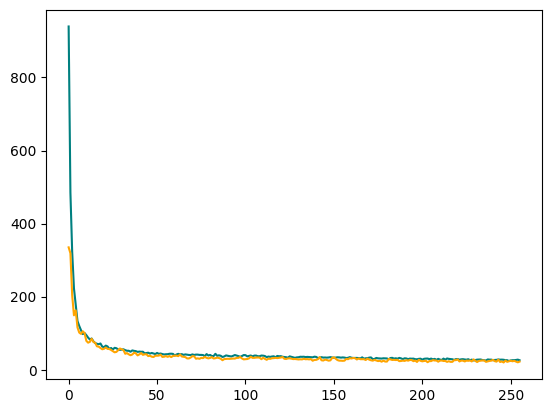

In [523]:
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
plt.show()

In [524]:
loss = model.evaluate(np.array(x_test), np.array(y_test), verbose=2)

print("Trained model, loss: {:5.2f}".format(loss))
# print("Trained model, accuracy: {:5.2f}%".format(100-loss))

2/2 - 0s - loss: 12.6623 - 40ms/epoch - 20ms/step
Trained model, loss: 12.66


In [525]:
x = [None] * 463
y = [None] * 463
for i in range(463):
  x[i] = img_tensors[i]
  y[i] = front_tensors[i]

idk = model.evaluate(np.array(x), np.array(y), verbose=2)

print("Trained model, loss: {:5.2f}".format(idk))
# print("Trained model, accuracy: {:5.2f}%".format(100-loss))

15/15 - 0s - loss: 13.9454 - 62ms/epoch - 4ms/step
Trained model, loss: 13.95


In [459]:
example = model.predict(np.array(x))
n = 450
print(example[n])
print(y[n])
print(abs(example[n]-y[n]))

15/15 [==============================] - 0s 6ms/step
[308.46872]
[314]
[5.53128052]


In [530]:
model.save('kerasLionfront.pb')

In [517]:
z_train = [None] * train_len

z_val = [None] * val_len

z_test = [None] * test_len


for i in range(train_len):
  z_train[i] = back_tensors[i]

for i in range(val_len):
  z_val[i] = back_tensors[i + train_len]

for i in range(test_len):
  z_test[i] = back_tensors[i+ train_len + val_len]

model_2 = keras.Sequential([
    layers.Dense(units = 512, activation = 'relu', input_shape = [1280]),
    layers.Dense(units = 256, activation = 'relu'),
    layers.Dense(units = 1)
])

model_2.compile(
    optimizer = keras.optimizers.Lion(learning_rate = 0.0005, use_ema = True),
    loss = "mean_absolute_error",
)

history_2 = model_2.fit(
    np.array(x_train), np.array(z_train),
    validation_data = [np.array(x_val), np.array(z_val)],
    epochs= 256,
    batch_size= 64,
)


Epoch 1/256
6/6 [==============================] - 1s 45ms/step - loss: 955.1912 - val_loss: 775.5683
Epoch 2/256
6/6 [==============================] - 0s 23ms/step - loss: 514.2798 - val_loss: 453.2200
Epoch 3/256
6/6 [==============================] - 0s 20ms/step - loss: 322.8073 - val_loss: 279.0292
Epoch 4/256
6/6 [==============================] - 0s 19ms/step - loss: 234.8783 - val_loss: 213.7377
Epoch 5/256
6/6 [==============================] - 0s 19ms/step - loss: 185.4036 - val_loss: 163.3152
Epoch 6/256
6/6 [==============================] - 0s 20ms/step - loss: 144.0358 - val_loss: 190.9109
Epoch 7/256
6/6 [==============================] - 0s 20ms/step - loss: 140.5919 - val_loss: 124.9051
Epoch 8/256
6/6 [==============================] - 0s 31ms/step - loss: 121.7442 - val_loss: 125.2768
Epoch 9/256
6/6 [==============================] - 0s 33ms/step - loss: 126.0137 - val_loss: 121.9078
Epoch 10/256
6/6 [==============================] - 0s 27ms/step - loss: 114.5126 

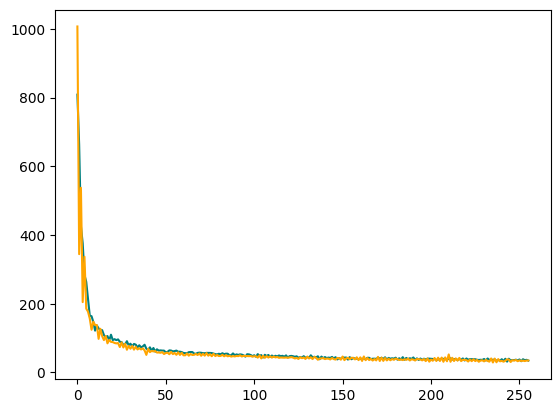

In [515]:
plt.plot(history_2.history['loss'], color = 'teal', label = 'loss')
plt.plot(history_2.history['val_loss'], color = 'orange', label = 'val_loss')
plt.show()

In [519]:
loss_2 = model_2.evaluate(np.array(x_test), np.array(z_test), verbose=2)

print("Trained model, loss: {:5.2f}".format(loss_2))

2/2 - 0s - loss: 13.6656 - 37ms/epoch - 19ms/step
Trained model, loss: 13.67


In [531]:
model_2.save('kerasLionback.pb')

In [ ]:
from google.colab import files


files.download('kerasLionfront.pb')